# The principle behind the confocal image simulation

This notebook contains a running example of the basic principle behind the confocal simulation.

First the necessary packages need to be loaded.

### Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Image properties

In [2]:
image_size = 15 # px (The image will be square 100 x 100)
pixel_size = 0.1 # um
dwell_time = 0.001 # s
psf_width = 0.3 # um (Width of the point spread function in focus)
diff_const = 1.# um^2/s (diffusion coefficient of mobile particles)

### Creating an image array

In [3]:
image_array = np.zeros((image_size,image_size))
print(image_array.shape)
print(image_array)

(15, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Generating an example image with one stationary particle

### Starting positions inside the frame

With np.random.rand() we can generate an array of random values between [0,1). To get a value within the frame, the interval has to be expanded to 

    [0,1) * image_size * pixel_size 
    
to get the position in um.

In [4]:
#help(np.random.rand)

In [5]:
np.random.rand()

0.7157374915180973

In [6]:
N = 1
start_pos = np.random.rand(N,2) * image_size * pixel_size
print(start_pos)

[[0.36544627 1.33435171]]


### Calculating the pixel intensity

The pixel intensity is dependent on the distance from the optical axis.

In [7]:
beam_pos = np.array([0, 0])
((start_pos - beam_pos)**2).sum()

1.9140454747312425

In [8]:
np.exp(- 2* ((start_pos - beam_pos)**2).sum()/ psf_width**2)

3.369528703431171e-19

In [9]:
for i in range(image_array.shape[0]):
    for j in range(image_array.shape[1]):
        beam_pos = np.array([j,i]) * pixel_size
        image_array[j,i] = np.exp(- 2* ((start_pos - beam_pos)**2).sum()/ psf_width**2)
print(np.array(image_array*1000,dtype=np.int))
image_array_stationary = np.array(image_array)

[[  0   0   0   0   0   0   0   0   0   0   4  15  34  50  46]
 [  0   0   0   0   0   0   0   0   0   3  17  61 139 203 189]
 [  0   0   0   0   0   0   0   0   0   8  45 160 364 530 494]
 [  0   0   0   0   0   0   0   0   1  13  75 268 608 885 826]
 [  0   0   0   0   0   0   0   0   1  14  81 287 652 948 884]
 [  0   0   0   0   0   0   0   0   1  10  55 197 447 651 607]
 [  0   0   0   0   0   0   0   0   0   4  24  86 197 286 267]
 [  0   0   0   0   0   0   0   0   0   1   6  24  55  80  75]
 [  0   0   0   0   0   0   0   0   0   0   1   4  10  14  13]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


### Display the particle on an image

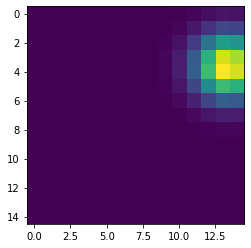

In [10]:
plt.imshow(image_array_stationary)

## Generating an example image with one mobile particle

In [11]:
#help(np.random.normal)

(1.5, 0)

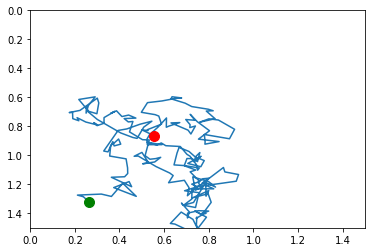

In [21]:
track = np.random.normal(loc=0,scale=np.sqrt(2*diff_const*dwell_time),size=(image_size*image_size,2)).cumsum(axis=0)

track += np.random.rand(2) * pixel_size * image_size

plt.plot(track[:,0],track[:,1])
plt.plot(track[0,0],track[0,1],'go',ms=10)
plt.plot(track[-1,0],track[-1,1],'ro',ms=10)
plt.xlim([0,pixel_size*image_size])
plt.ylim([pixel_size*image_size,0])

In [22]:
for i in range(image_array.shape[0]):
    for j in range(image_array.shape[1]):
        beam_pos = np.array([j,i]) * pixel_size
        image_array[i,j] = np.exp(- 2* ((track[j+i*image_array.shape[1]] - beam_pos)**2).sum()/ psf_width**2)
print(np.array(image_array*1000,dtype=np.int))
image_array_mobile = np.array(image_array)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   2   0   0   0   0   0   0   0   0   0]
 [ 13  22  11   7   6   1   0   0   0   0   0   0   0   0   0]
 [  1   3  23  31  46  13   3   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   2   5  15   3   0   0   2   0   0   0]
 [  0   0   0   0   0   3  35 103 120 111  60  23   1   0   0]
 [  0   0   1   5  45 363 684 907 868 579 276  62   6   0   0]
 [  0   0   1  17 101 290 539 351 157  19  12   0   0   0   0]
 [  0   0   0   0   5  17  49  26  28  10   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


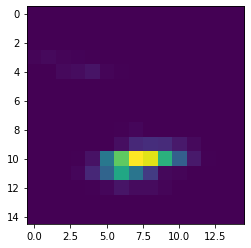

In [23]:
plt.imshow(image_array)

## Adding Poisson noise to the image

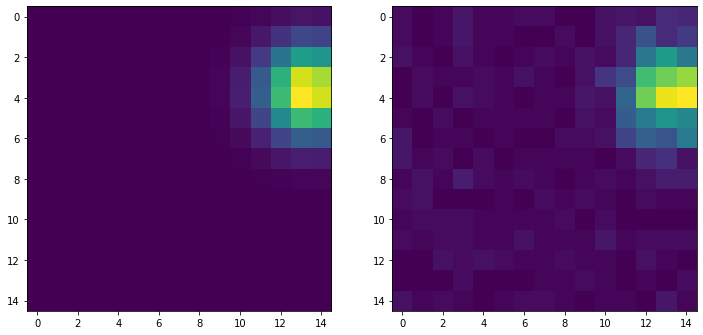

In [25]:
image_array_intensity = image_array_stationary * 70
image_array_intensity += 1.2
noisy = np.random.poisson(image_array_intensity)
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.imshow(image_array_stationary)
plt.subplot(122)
plt.imshow(noisy)

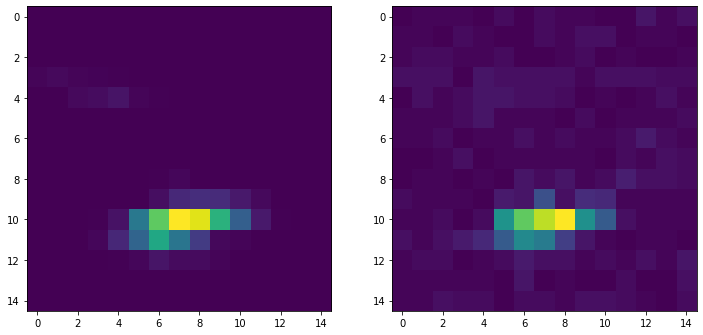

In [24]:
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.imshow(image_array_mobile)
plt.subplot(122)
plt.imshow(np.random.poisson(image_array_mobile * 70 + 1.2))